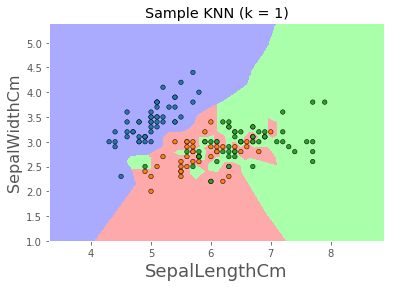

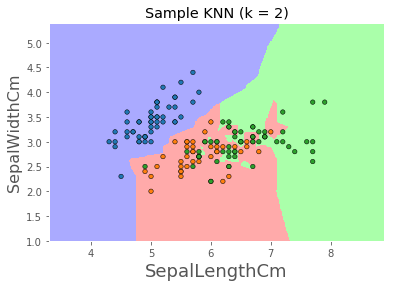

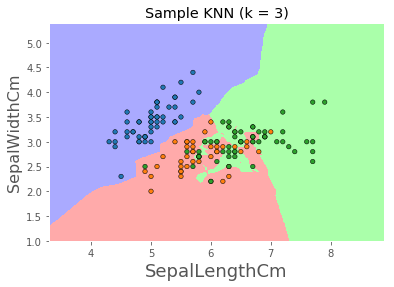

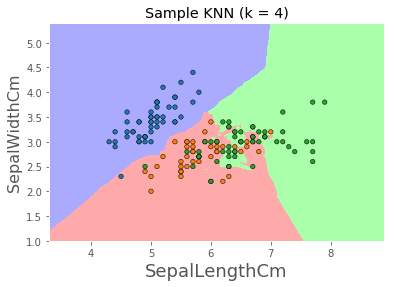

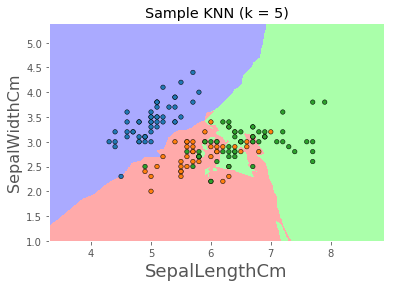

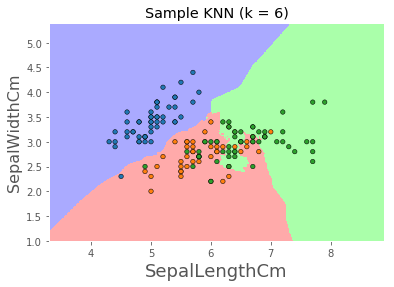

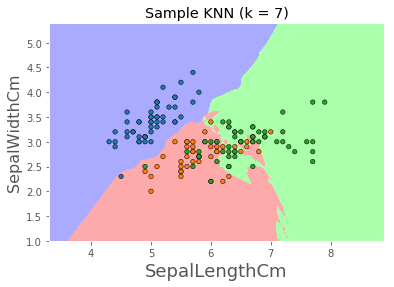

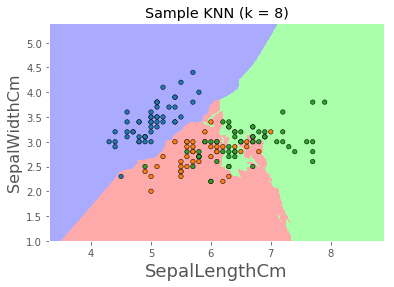

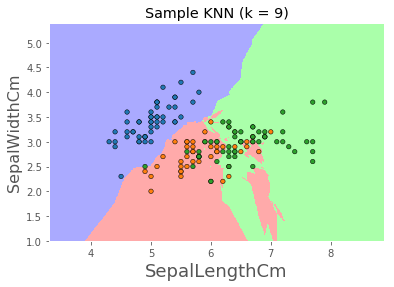

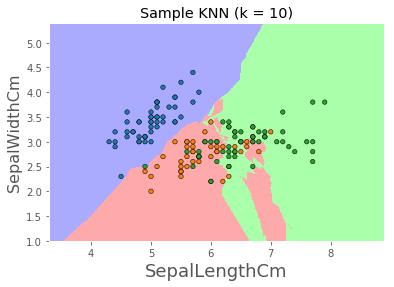

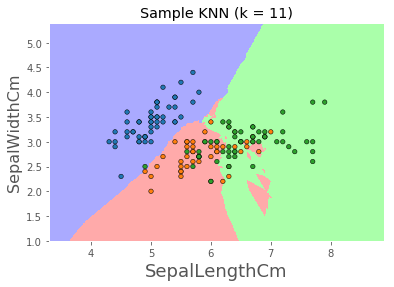

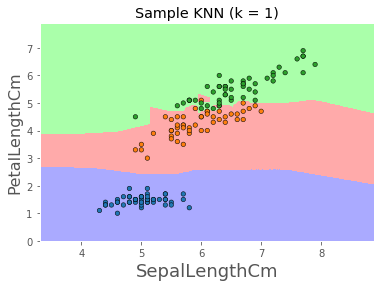

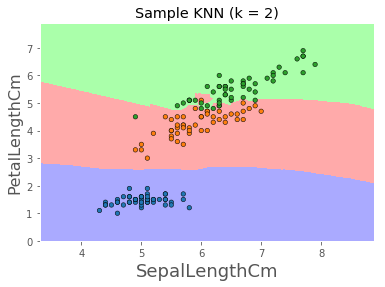

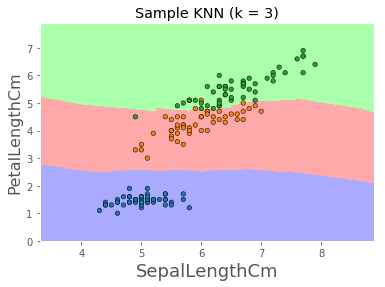

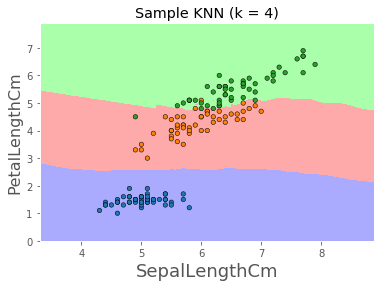

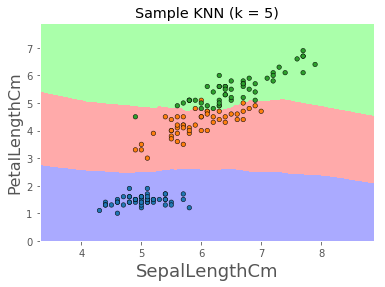

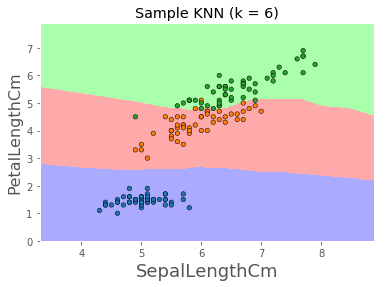

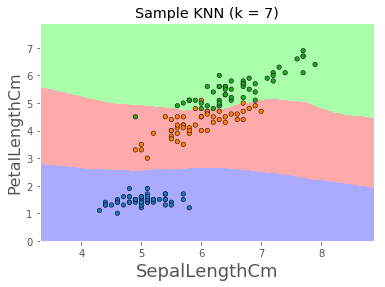

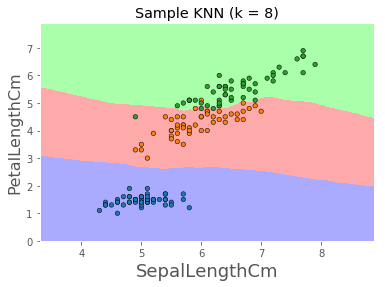

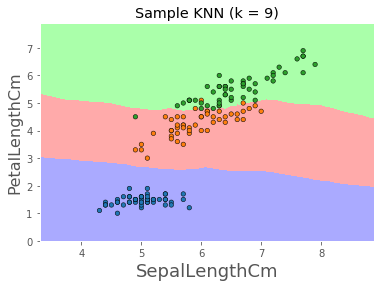

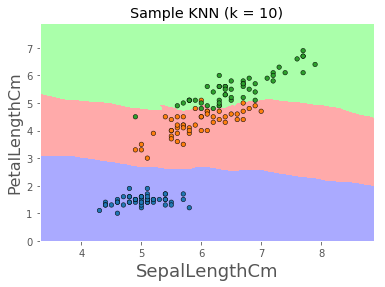

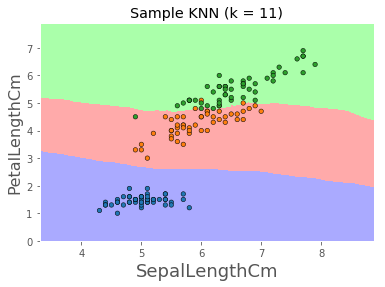

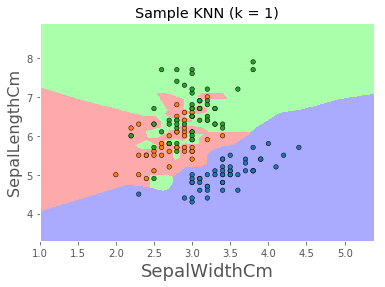

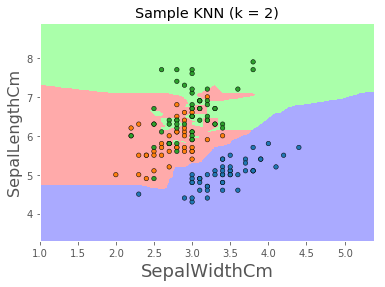

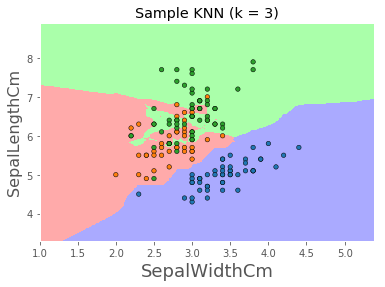

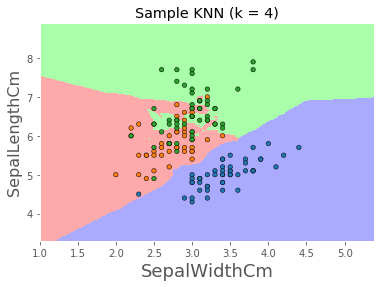

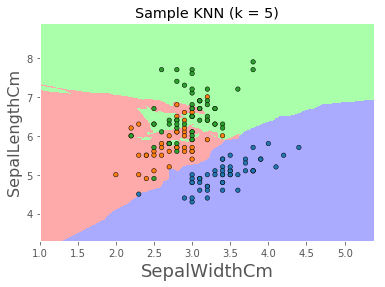

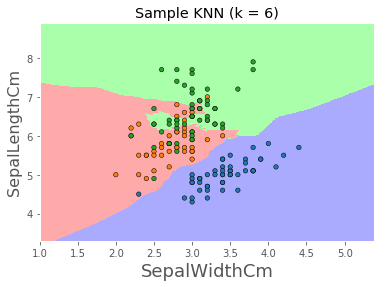

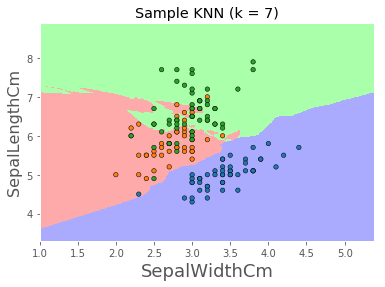

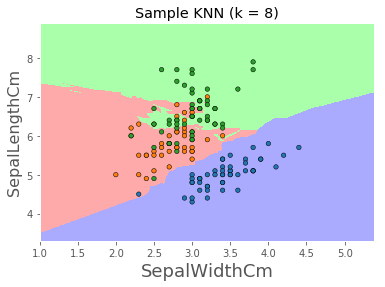

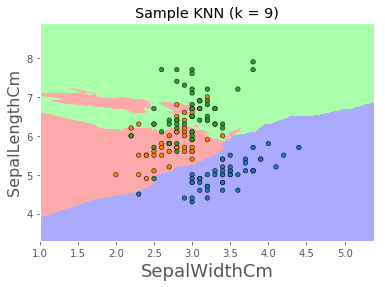

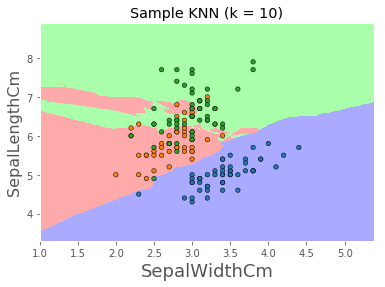

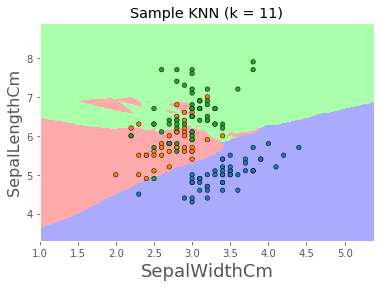

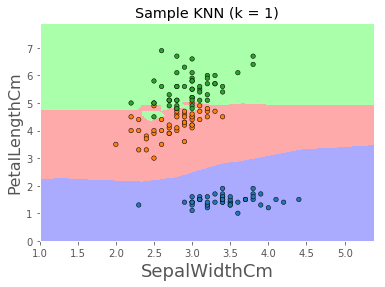

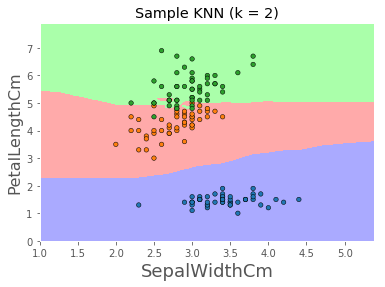

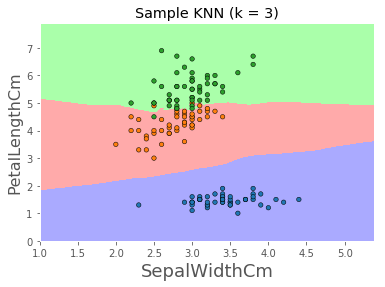

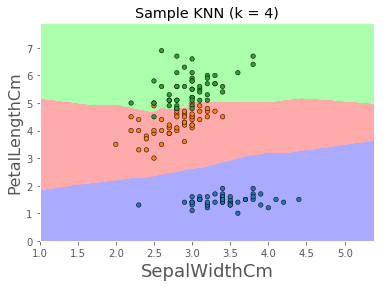

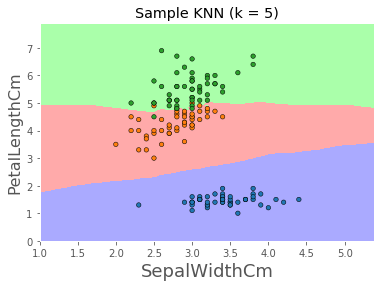

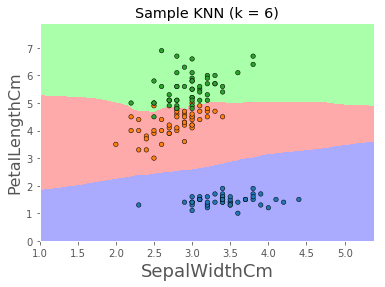

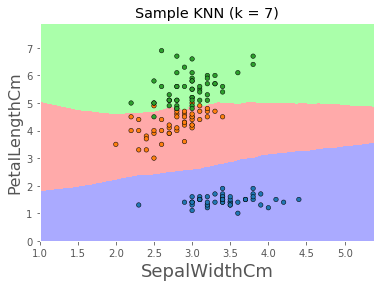

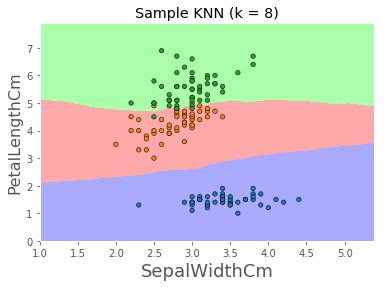

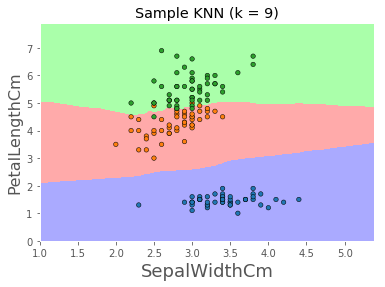

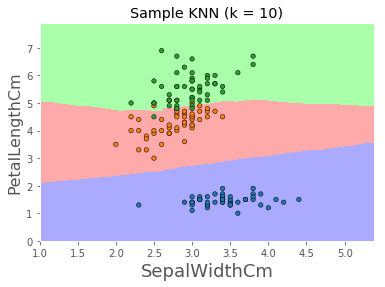

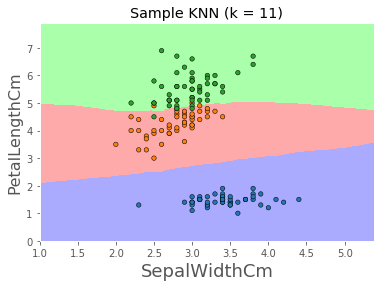

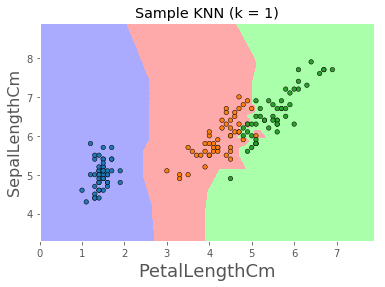

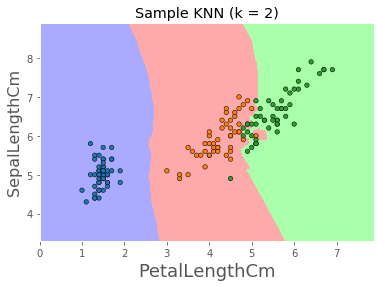

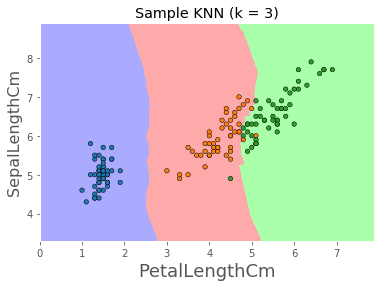

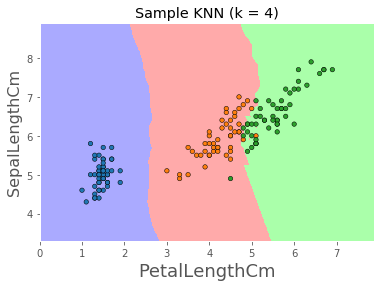

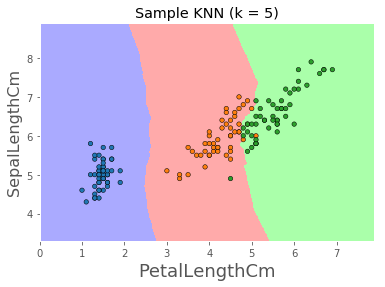

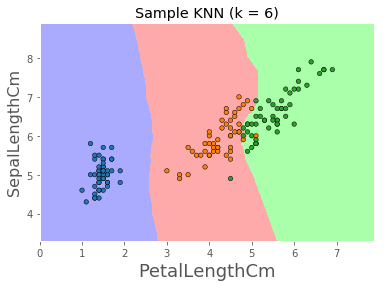

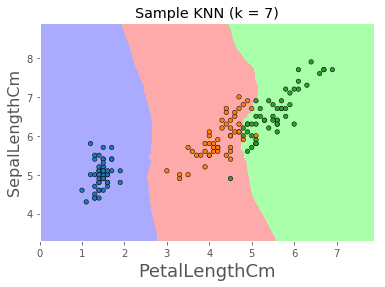

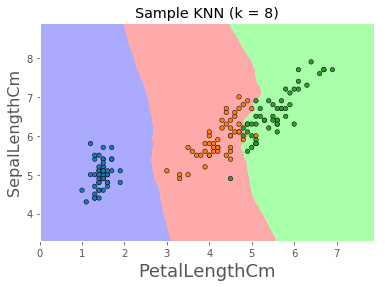

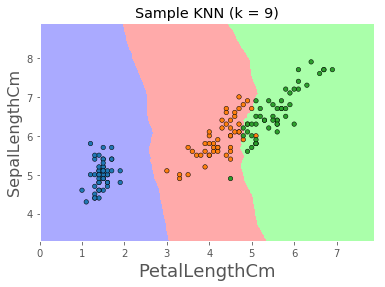

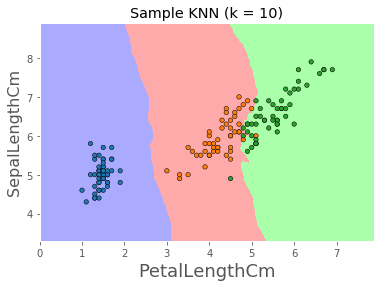

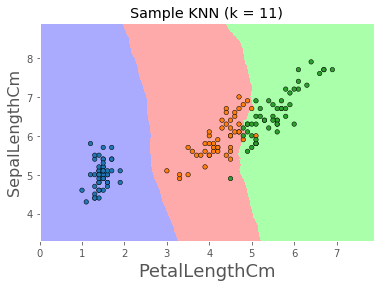

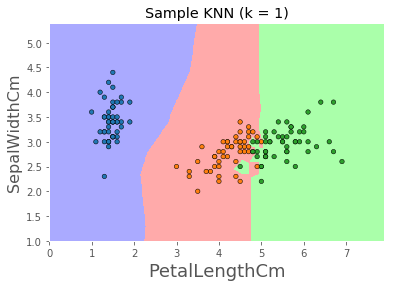

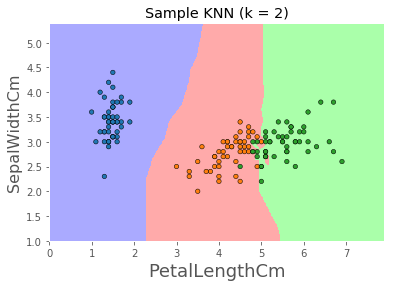

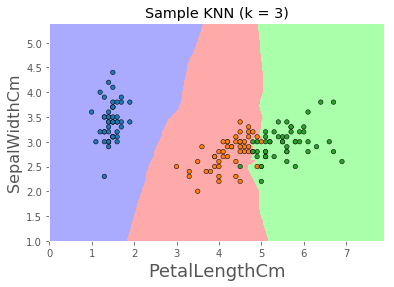

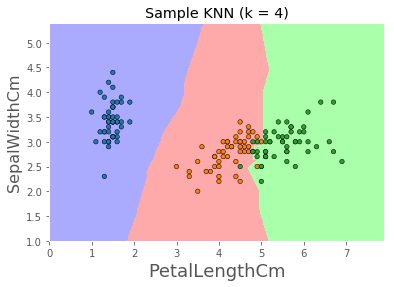

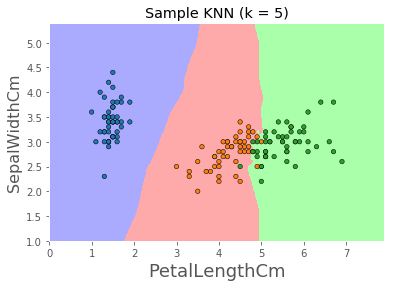

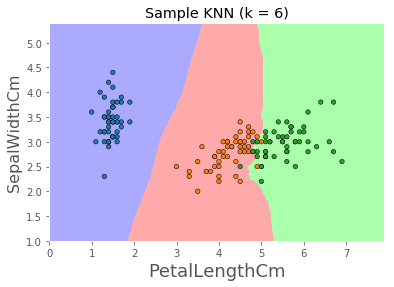

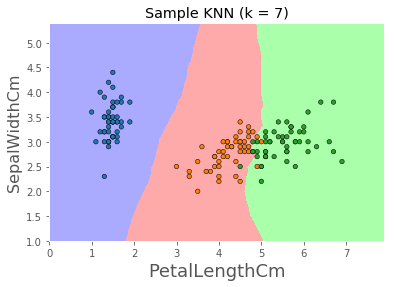

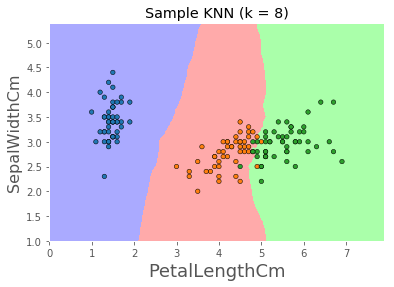

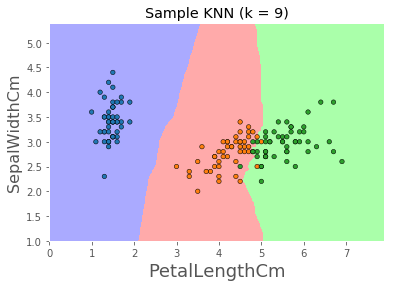

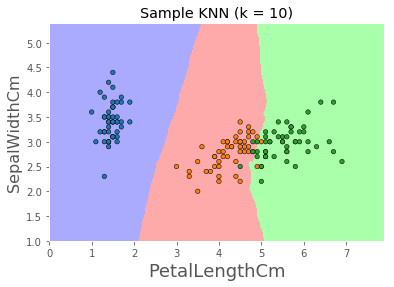

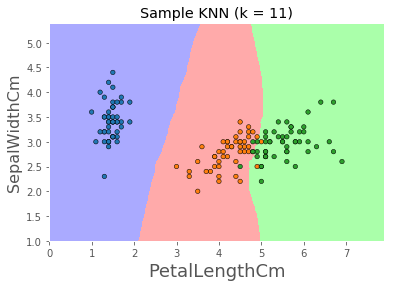

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
dataset=pd.read_csv(r'C:\Users\artemii.melnyk\PycharmProjects\KKN\venv\Iris.csv')
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Transform our human names to 0 1 2
le = LabelEncoder()
y = le.fit_transform(y)

plt.style.use('ggplot')# just for beauty

# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#2077B4', '#FF7F0E', '#2CA02C'])
h = .01  # step size in the mesh
for x in range(0, 3):
    for x2 in range(0, 3):
        if x == x2:
            continue
        X = np.array(dataset[[feature_columns[x], feature_columns[x2]]])
        for  n_neighbors in range(1,12):

                # we create an instance of Neighbours Classifier and fit the data.
                clf = neighbors.KNeighborsClassifier(n_neighbors)
                clf.fit(X, y)

                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, x_max]x[y_min, y_max].
                x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
                y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
                xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
                Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                plt.figure()
                plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

                # Plot also the training points
                plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                                    edgecolor='k', s=20)
                plt.xlim(xx.min(), xx.max())
                plt.ylim(yy.min(), yy.max())
                plt.title("Sample KNN (k = %i)" % (n_neighbors))

                plt.axis()
                plt.xlabel(feature_columns[x], fontsize=18)
                plt.ylabel(feature_columns[x2], fontsize=16)

                plt.show()